In [61]:
import numpy as np
import pylab as plt

In [62]:
angles = np.load('hs_tomography/alphas_77.npy')
print(angles)

[-89 -87 -85 -83 -81 -79 -77 -75 -73 -71 -69 -67 -65 -63 -61 -59 -57 -55
 -53 -51 -49 -47 -45 -43 -41 -39 -37 -35 -33 -31 -29 -27 -25 -23 -21 -19
 -17 -15 -13 -11  -9  -7  -5  -3  -1   1   3   5   7   9  11  13  15  17
  19  21  23  25  27  29  31  33  35  37  39  41  43  45  47  49  51  53
  55  57  59  61  63  65  67  69  71  73  75  77  79  81  83  85  87  89]


In [85]:
def orientation_mat(angles, offset=90):
    zero_angle = offset / 360 * 2 * np.pi
    or_mat = np.empty((len(angles), 2))
    for i, angle in enumerate(angles):
        cos = np.cos(angle/360*2*np.pi + zero_angle)
        sin = np.sin(angle/360*2*np.pi + zero_angle)
        norm = np.sqrt(cos**2 + sin**2)
        or_mat[i, 0] = cos / norm
        or_mat[i, 1] = sin / norm
    return or_mat

In [86]:
def pixel_coordinates(im_size):
    x, y = np.mgrid[0:im_size[0], 0:im_size[1]]
    x = x - 0.5*im_size[0]
    y = y - 0.5*im_size[1]
    x = np.expand_dims(x, 2)
    y = np.expand_dims(y, 2)
    coordinates = np.concatenate((x, y), axis=2)
    coordinates.shape = (im_size[0]*im_size[1], 2)
    coordinates = coordinates.T
    return coordinates

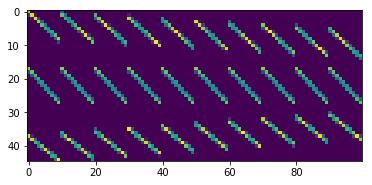

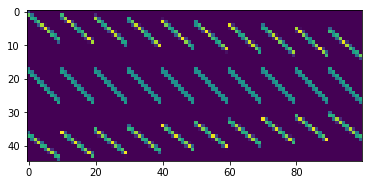

[[False  True  True ...,  True  True  True]
 [False False False ...,  True  True  True]
 [ True False False ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


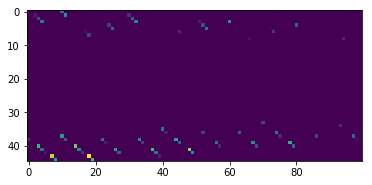

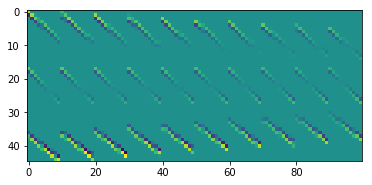

In [109]:
from scipy import sparse

def construct_x(im_size, alphas, bins):
    or_mat = orientation_mat(alphas, offset=90)
    coordinates = pixel_coordinates(im_size)
    det_len = np.sqrt(im_size[0]**2 + im_size[1]**2)
    projections = np.dot(or_mat, coordinates) + det_len / 2
    d = det_len / bins
    proj_coord = projections / d
    lower_bin = np.floor(proj_coord)
    upper_weight = proj_coord - lower_bin
    upper_bin = lower_bin + 1
    upper_bin = np.clip(upper_bin, 0, bins-1)
    lower_weight = 1 - upper_weight
    
    weights = []
    x_col = []
    x_row = []
    
    #columns in projections
    for i in range(projections.shape[1]):
        #rows in projections
        for j in range(projections.shape[0]):
            #placing lower weight 
            weights.append(lower_weight[j, i])
            x_col.append(i)
            x_row.append(j * bins + lower_bin[j, i])
            #placing upper weight
            if upper_bin[j, i] < bins:
                weights.append((upper_weight[j, i]))
                x_col.append(i)
                x_row.append(j * bins + upper_bin[j, i])
    
    x = sparse.coo_matrix((weights, (x_row, x_col)), shape=(len(alphas)*bins, im_size[0]*im_size[1])\
                                                    , dtype=np.float32)
    return x
    
x = construct_x((10, 10), [-33, 0, 42], 15)
x = x.toarray()
plt.imshow(x)
plt.show()
example = np.load('hs_tomography/X_example.npy')
plt.imshow(example)
plt.show()
print(x == example)

false_zeros = 0
must_be_zero = []
for i in range(45):
    for j in range(100):
        if example[i, j] == 0 and x[i, j] != 0:
            false_zeros += 1
            must_be_zero.append([i, j, x[i,j]])
            
#print(false_zeros)
#print(must_be_zero)

pic = np.zeros((45, 100))
for non_zero in must_be_zero:
    pic[non_zero[0], non_zero[1]] = non_zero[2]
plt.imshow(pic)
plt.show()

plt.imshow(x - example)
plt.legend
plt.show()

In [78]:
np.sqrt(2)*10

14.142135623730951